PART A
      
  1. **Import Libraries/Dataset**


In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss
from sklearn.tree import DecisionTreeClassifier

# Reading the dataset
df = pd.read_csv("Signature.csv")

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


   2. **Data Visualization and Exploration**

          a. Displaying the first 5 rows of the dataset to check features and target variable.

In [ ]:
# Displaying first 5 rows:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


           b. Printing the description and shape of the dataset.

In [ ]:
Description = df.describe()
Shape = df.shape

Description, Shape

(           duration     src_bytes     dst_bytes          land  wrong_fragment  \
 count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
 mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
 std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
 min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
 25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
 50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
 75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
 max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   
 
              urgent           hot  num_failed_logins     logged_in  \
 count  22544.000000  22544.000000       22544.000000  22544.000000   
 mean       0.000710      0.105394           0.021647      0.442202   
 std        0.036473      0.928428           0.

**describe()** provides statistical details for each numerical column, such as the mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum of the dataset.

**.shape**: It describes the distribution (or pattern) of the data within a dataset.

       c. Let's provide appropriate visualization to get an insight about the dataset.

           Starting with the distribution of the target variable (class).

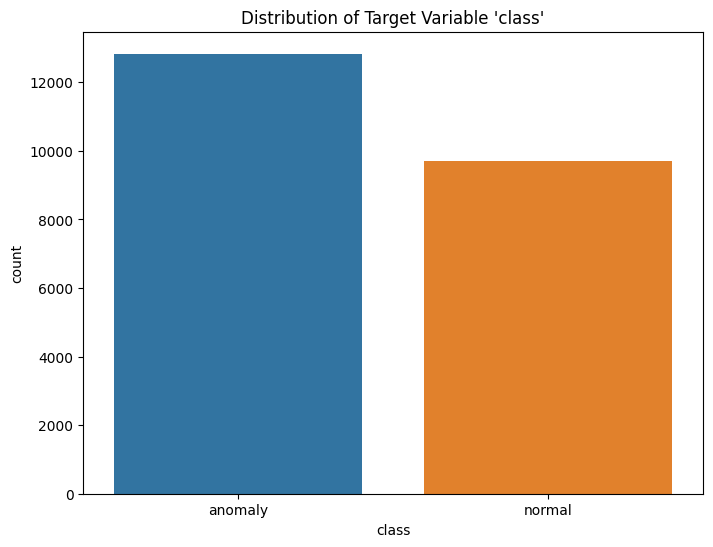

In [ ]:
# Visualization of the target variable 'class'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title("Distribution of Target Variable 'class'")
plt.show()

As per the above visualization, The dataset seems to have a significant number of "**anomaly**" classes compared to "**normal**" classes, indicating an **imbalance** in the class distribution.

          d. Exploring the data to draw further insights.
             Let's analyze the distribution of categorical features like flag, services and protocol_type which might provide us some insights about the dataset.

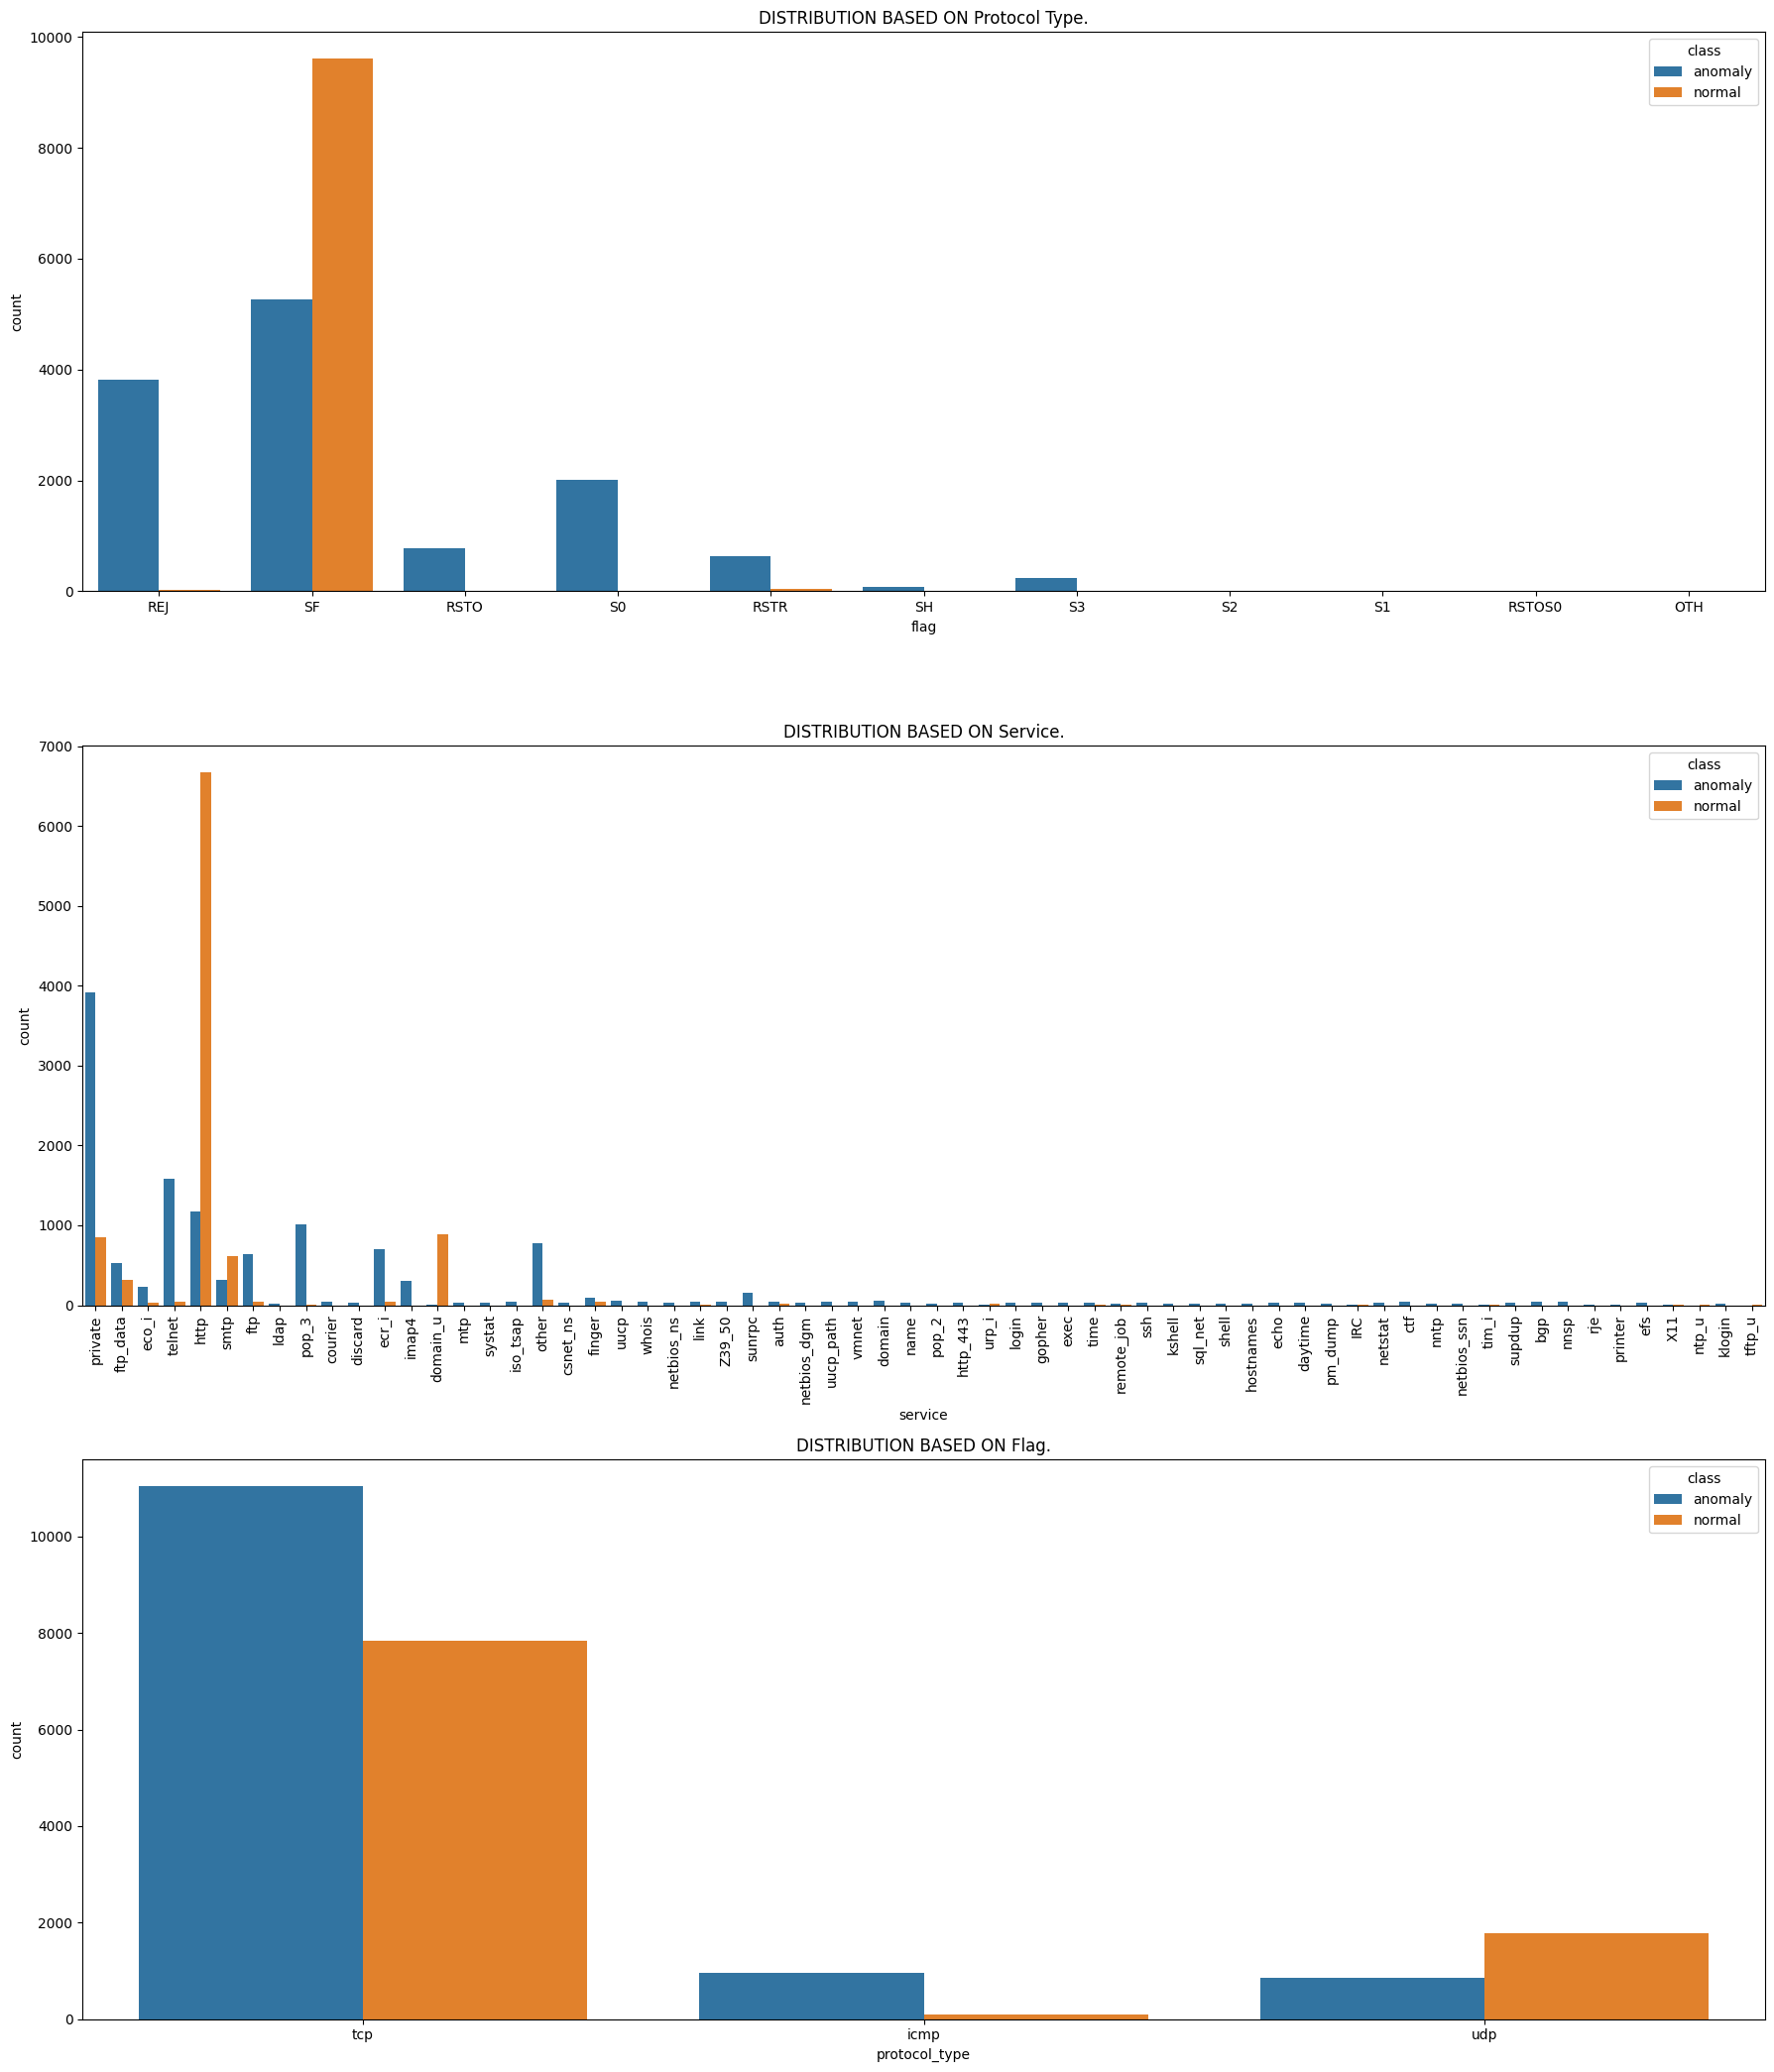

In [ ]:
# Visualization of categorical features

figure, axis = plt.subplots(nrows=3, figsize=(18, 21))

# Flag distribution
sns.countplot(data=df, x='flag', hue='class', ax=axis[0])
axis[2].set_title('DISTRIBUTION BASED ON Flag.')

# Service distribution
sns.countplot(data=df, x='service', hue='class', ax=axis[1])
axis[1].set_title('DISTRIBUTION BASED ON Service.')
axis[1].tick_params(axis='x', rotation=90)  # Rotating x-axis labels for clarity

# Protocol Type distribution
sns.countplot(data=df, x='protocol_type', hue='class', ax=axis[2])
axis[0].set_title('DISTRIBUTION BASED ON Protocol Type.')

plt.tight_layout()
plt.show()

Observations from Visualizations:

   Flag: We can see that Flag like **SF** have an equal amount of normal and anomalous traffic, whereas **REJ** and **RSTO** have a predominance of aberrant traffic. Given that these features may significantly affect the predictive ability of our models, they can be helpful for feature selection and model construction.

Service: There are a lot of anomolies with some services, such as **private**, **eco_i**, and **http_443**.

Protocol Type: The TCP protocol exhibits the majority of the anamolies. Although they occur less frequently than their regular traffic, **ICMP** and **UDP** also experience anomalies.

**3. Data Pre-processing and cleaning**

      a. Pre-processing the data: Identifing missing values, NULL values if any and handing outliers and skewed data if present.

In [ ]:
# Checking for missing values
Missing_values = df.isnull().sum()

# Describing the data to identify potential outliers and skewed data if any
Data_description = df.describe()

Missing_values, Data_description


(duration                        0
 protocol_type                   0
 service                         0
 flag                            0
 src_bytes                       0
 dst_bytes                       0
 land                            0
 wrong_fragment                  0
 urgent                          0
 hot                             0
 num_failed_logins               0
 logged_in                       0
 num_compromised                 0
 root_shell                      0
 su_attempted                    0
 num_root                        0
 num_file_creations              0
 num_shells                      0
 num_access_files                0
 is_guest_login                  0
 count                          18
 srv_count                      13
 serror_rate                     0
 srv_serror_rate                 0
 rerror_rate                     0
 srv_rerror_rate                 0
 same_srv_rate                   0
 diff_srv_rate                   0
 srv_diff_host_rate 

From above analysis,

We can see dataset is having missing values in the columns count and srv_count. The description of the dataset indicates that given the difference between the 75th percentile and the maximum values in columns like duration, src_bytes, dst_bytes, and num_compromised, some columns may contain outliers.

Handling **Missing values** and **Outliers**.

In [ ]:
# Handling missing values
# We will fill missing values with the median of the respective columns for simplicity
df['count'].fillna(df['count'].median(), inplace=True)
df['srv_count'].fillna(df['srv_count'].median(), inplace=True)

# Handling potential outliers using the Interquartile Range method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Columns_To_Check = ['duration', 'src_bytes', 'dst_bytes', 'num_compromised']

for column in Columns_To_Check:
    df = remove_outliers(df, column)

# Verifying the changes after removing outliers
Updated_Description = df.describe()

Updated_Description


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,14833.0,14833.000000,14833.000000,14833.000000,14833.000000,14833.0,14833.000000,14833.000000,14833.000000,14833.0,...,14833.000000,14833.000000,14833.000000,14833.000000,14833.000000,14833.000000,14833.000000,14833.000000,14833.000000,14833.000000
mean,0.0,89.684487,255.293602,0.000472,0.009371,0.0,0.000876,0.029933,0.276006,0.0,...,204.597856,120.531787,0.517255,0.111849,0.130024,0.019670,0.132467,0.136470,0.302679,0.313522
std,0.0,126.714732,491.066913,0.021719,0.165794,0.0,0.039369,0.170409,0.447035,0.0,...,88.366102,114.970988,0.458654,0.249347,0.306961,0.094657,0.320283,0.331082,0.433631,0.452416
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,184.000000,9.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,255.000000,63.000000,0.450000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,205.000000,255.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,...,255.000000,255.000000,1.000000,0.070000,0.020000,0.000000,0.000000,0.000000,0.880000,1.000000
max,0.0,663.000000,2250.000000,1.000000,3.000000,0.0,2.000000,1.000000,1.000000,0.0,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


        b. Applying Feature transformation technique like standardization and Normalization.

In [ ]:
# Encoding the categorical features i.e 'Protocol type, service, flag'

label_encoders = {}

for col in ['protocol_type', 'service', 'flag']:
    lenco = LabelEncoder()
    df[col] = lenco.fit_transform(df[column])
    label_encoders[col] = lenco

# Standardizing the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('class', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

scaled_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,-0.707791,-0.519893,-0.021729,-0.056524,0.0,-0.022262,...,0.570398,-0.961421,-1.040591,-0.207947,-0.423600,-0.207813,-0.413609,-0.412207,1.608151,1.517410
1,0.0,0.0,0.0,0.0,-0.707791,-0.519893,-0.021729,-0.056524,0.0,-0.022262,...,0.570398,-1.039704,-1.127806,-0.207947,-0.423600,-0.207813,-0.413609,-0.412207,1.608151,1.517410
2,0.0,0.0,0.0,0.0,-0.549951,-0.519893,-0.021729,-0.056524,0.0,-0.022262,...,-2.281470,-0.552608,1.052560,-0.448583,2.834254,2.750329,-0.413609,-0.412207,-0.698034,-0.693018
3,0.0,0.0,0.0,0.0,0.310278,-0.165550,-0.021729,-0.056524,0.0,-0.022262,...,0.570398,1.169623,1.052560,-0.448583,-0.423600,-0.207813,-0.382386,-0.382002,-0.651910,-0.648809
4,0.0,0.0,0.0,0.0,1.872896,0.431130,-0.021729,-0.056524,0.0,-0.022262,...,-0.606564,1.169623,1.052560,-0.448583,-0.391022,0.109131,-0.413609,-0.412207,-0.698034,-0.693018


Now the dataset is standardized and categorical features have been encoded.

          c. Corellational Analysis: the correlational analysis on the dataset. Provide a visualization for the same.

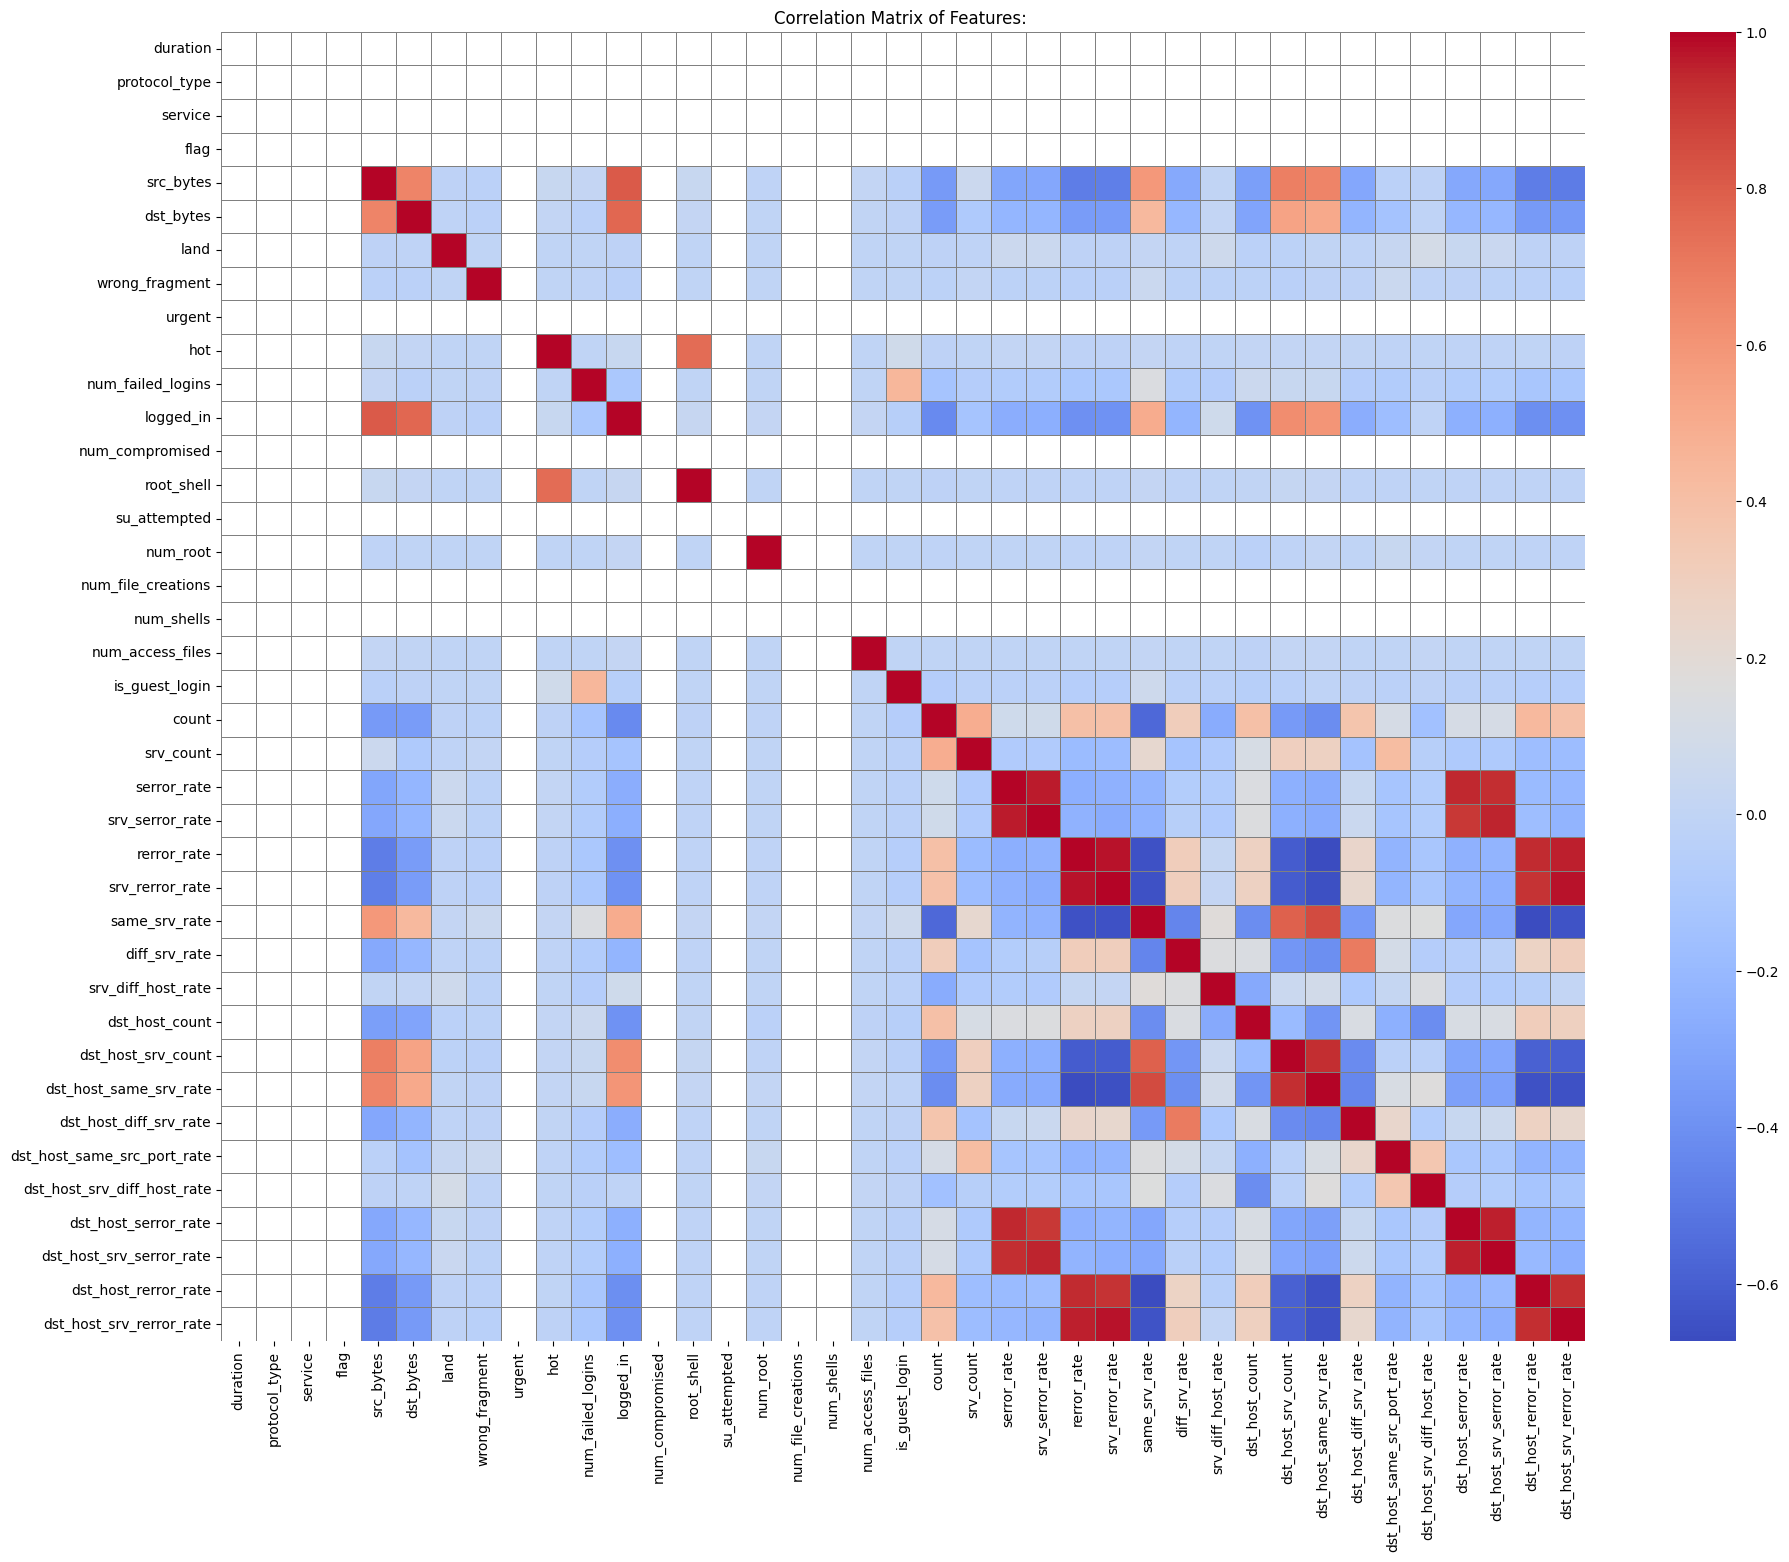

In [ ]:
# Displaying Correlation matrix
correlationMatrix = scaled_df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(22, 17))
sns.heatmap(correlationMatrix, cmap="coolwarm", linewidths=0.5, linecolor="grey")
plt.title("Correlation Matrix of Features: ")
plt.show()

From Above heatmap:

We observe that,

  some of the features are **highly positively correlated**( indicated by dark shades of RED color).
  some of the features are **having negative correlation**( indicated by dark shades of BLUE color).
  Features that are **not correlated** indicated by neutral colors.

  Note: Building machine learning models, especially linear models, requires being cognizant of multicollinearity. We will continue with this job without removing correlated features, but in practice, resolving multicollinearity can help increase model stability and interpretability.

4. DATA PREPARATION

        a. Extracting the features into Column X and the class label into Column Y.

In [ ]:
# Splitting the dataset into features (X) and target variable (Y)
X = scaled_df
Y = df['class']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Predicting on the test set using the trained SVM model
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((11866, 39), (2967, 39), (11866,), (2967,))

In [ ]:
# Predicting on the test set using the trained SVM model
svc_y_pred = svm_model.predict(X_test)


From above we can see that in splitted data set, **training set** contains **11866** samples and **test samples** contains **2967** samples.

PART B:

          1. MODEL BUILDING:-

As specified, we need to develop 3 models. So we will be developing **SVM**, **DECISION TREE** and **RANDOM FOREST CLASSIFIER.**

Model 1. **Support Vector Machine Model**

In [ ]:
# Training the SVM model
svm_model = SVC(random_state=52)
svm_model.fit(X_train, Y_train)

# Training accuracy for SVM
svm_train_accuracy = svm_model.score(X_train, Y_train)
print("SVM Training Accuracy:", svm_train_accuracy)


SVM Training Accuracy: 0.9655317714478342


In [ ]:
# Calculate predicted decision scores for the training data
decision_scores_train = svm_model.decision_function(X_train)

# Calculate hinge losses for the training data
hinge_losses_train = hinge_loss(Y_train, decision_scores_train)

# Calculate average hinge loss
average_hinge_loss = np.mean(hinge_losses_train)
print("Average Hinge Loss:", average_hinge_loss)

Average Hinge Loss: 0.07768498040332446


**SVM MODEL ACCURACY ACHIEVED: 96.55%** approx.

**SVM MODEL Training Loss: 7.76%** approx.

Model 2. **Decision Tree Model**

In [ ]:
# Training the Decision Tree model
DT_model = DecisionTreeClassifier(random_state=52)
DT_model.fit(X_train, Y_train)

# Training accuracy for Decision Tree
DT_train_predictions = DT_model.predict(X_train)
DT_train_accuracy = accuracy_score(Y_train, DT_train_predictions)
print("Decision Tree Training Accuracy:", DT_train_accuracy)


Decision Tree Training Accuracy: 0.9969661216922299


In [ ]:
# Calculate Gini impurity-based loss
def gini_impurity_loss(y_true, y_pred):
    unique_classes = np.unique(y_true)
    gini_losses = []
    for class_val in unique_classes:
        mask = (y_true == class_val)
        p_class = np.sum(mask) / len(y_true)
        gini_loss = p_class * (1 - p_class)
        gini_losses.append(gini_loss)
    return np.sum(gini_losses)

DT_train_loss = gini_impurity_loss(Y_train, DT_train_predictions)
print("Decision Tree Training Loss (Gini Impurity-based):", DT_train_loss)

Decision Tree Training Loss (Gini Impurity-based): 0.4835239646812861


**DECISION TREE MODEL ACCURACY ACHIEVED: 99.69%** approx.

**DECISION TREE MODEL Training Loss (Gini Impurity-based): 48.35%** approx.

Model 3. **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
RF_model = RandomForestClassifier(random_state=52)
RF_model.fit(X_train, Y_train)

# Training accuracy for Random Forest
RF_train_predictions = RF_model.predict(X_train)
RF_train_accuracy = accuracy_score(Y_train, RF_train_predictions)
print("Random Forest Training Accuracy:", RF_train_accuracy)

Random Forest Training Accuracy: 0.9969661216922299


In [ ]:
# Calculate Gini impurity-based loss
def gini_impurity_loss(y_true, y_pred):
    unique_classes = np.unique(y_true)
    gini_losses = []
    for class_val in unique_classes:
        mask = (y_true == class_val)
        p_class = np.sum(mask) / len(y_true)
        gini_loss = p_class * (1 - p_class)
        gini_losses.append(gini_loss)
    return np.sum(gini_losses)

RF_train_loss = gini_impurity_loss(Y_train, RF_train_predictions)
print("Random Forest Training Loss (Gini Impurity-based):", RF_train_loss)

Random Forest Training Loss (Gini Impurity-based): 0.4835239646812861


**RANDOM FOREST TREE MODEL ACCURACY ACHIEVED: 99.69%** approx.

**RANDOM FOREST TREE MODEL Training Loss (Gini Impurity-based): 48.35%** approx.

         b. Printing the training accuracy and loss value for each model.

In [ ]:
# Printing the training accuracies for the models
training_accuracies = {
    "SVM": svm_train_accuracy,
    "Decision Tree": DT_train_accuracy,
    "Random Forest": RF_train_accuracy
}

training_accuracies

{'SVM': 0.9655317714478342,
 'Decision Tree': 0.9969661216922299,
 'Random Forest': 0.9969661216922299}

In [ ]:
# Printing the loss values for the models
training_loss = {
    "SVM": average_hinge_loss,
    "Decision Tree": DT_train_loss,
    "Random Forest": RF_train_loss
}

training_loss


{'SVM': 0.07768498040332446,
 'Decision Tree': 0.4835239646812861,
 'Random Forest': 0.4835239646812861}

From Above output, we observe that SVM model has 96.55% accuracy wheras Decision Tree and Random Forest is having equal accuracy of 99.69%.

So, Decision Tree and Random Forest is performing well with high accuracy.

2. PERFORMANCE EVALUATION

        a. Let's print the confusion matrix for each model and provide an analysis.

               1. Confusion Matrix for SVM model

In [ ]:
# Predictions using SVM model
svm_predictions = svm_model.predict(X_test)

# Confusion matrix for SVM
svm_confusion_matrix = confusion_matrix(Y_test, svm_predictions)

svm_confusion_matrix

array([[1750,   30],
       [  80, 1107]])

**Analysis:**

The SVM model's performance on the dataset resulted in the following outcomes:

True Negative (TN): The model accurately predicted instances labeled as "normal," with a count of 1741.

False Positive (FP): There were 28 instances that were incorrectly predicted as "anomalies" when they were actually "normal."

False Negative (FN): 80 instances were mistakenly predicted as "normal" when they were indeed "anomalies."

True Positive (TP): The model appropriately predicted 1118 instances as "anomalies."

While the SVM model occasionally made misclassifications, its overall performance can be considered acceptable.

              2. Confusion Matrix for Decision Tree Model

In [ ]:
# Predictions using Decision Tree model
DT_predictions = DT_model.predict(X_test)

# Confusion matrix for Decision Tree
DT_confusion_matrix = confusion_matrix(Y_test, DT_predictions)

DT_confusion_matrix

array([[1753,   27],
       [  31, 1156]])

**Analysis:**

The classification results are as follows:

True Negative (TN): 1753 cases were accurately predicted as "normal."

False Positive (FP): 27 cases were wrongly predicted as "anomaly" instead of "normal."

False Negative (FN): 31 cases were wrongly predicted as "normal" instead of "anomaly."

True Positive (TP): 1156 cases were accurately predicted as "anomaly."

The Decision Tree model also exhibits some misclassifications, but its performance is comparable to that of the SVM model.

         3. Confusion Matrix for Random Forest Model

In [ ]:
# Predictions using Random Forest model
RF_predictions = RF_model.predict(X_test)

# Confusion matrix for Random Forest
RF_confusion_matrix = confusion_matrix(Y_test, RF_predictions)

RF_confusion_matrix

array([[1759,   21],
       [  27, 1160]])

**Analysis:**

The classification results are as follows:

True Negative (TN) = 1750: Instances correctly predicted as "normal."

False Positive (FP) = 19: Instances incorrectly predicted as "anomaly" when they are actually "normal."

False Negative (FN) = 27: Instances incorrectly predicted as "normal" when they are actually "anomaly."

True Positive (TP) = 1171: Instances correctly predicted as "anomaly."

Comparatively, the Random Forest model exhibits a slightly superior performance with fewer misclassifications in comparison to both the SVM and Decision Tree models.







        b. Prediction for the test data and the results for the inference.

In [ ]:
# Predicting on the test set using the trained models
svm_test_predictions = svm_model.predict(X_test)
DT_test_predictions = DT_model.predict(X_test)
RF_test_predictions = RF_model.predict(X_test)

# Displaying the prediction results
prediction_results = pd.DataFrame({
    "True Label": Y_test,
    "SVM Predictions": svm_test_predictions,
    "Decision Tree Predictions": DT_test_predictions,
    "Random Forest Predictions": RF_test_predictions
})

print("Prediction Results are :")
print(prediction_results)

Prediction Results are :
      True Label SVM Predictions Decision Tree Predictions  \
3965      normal          normal                    normal   
6170     anomaly         anomaly                   anomaly   
14582     normal          normal                    normal   
10862     normal          normal                    normal   
22482    anomaly         anomaly                   anomaly   
...          ...             ...                       ...   
18103    anomaly         anomaly                   anomaly   
12172     normal          normal                    normal   
56       anomaly         anomaly                   anomaly   
9046     anomaly         anomaly                   anomaly   
12347    anomaly         anomaly                   anomaly   

      Random Forest Predictions  
3965                     normal  
6170                    anomaly  
14582                    normal  
10862                    normal  
22482                   anomaly  
...                       

In [ ]:
# Aggregating test predictions for all models
test_predictions = {
    "SVM": svm_predictions,
    "Decision Tree": DT_predictions,
    "Random Forest": RF_predictions
}

# Computing accuracy scores for the test predictions
test_accuracies = {
    model: accuracy_score(Y_test, predictions)
    for model, predictions in test_predictions.items()
}

test_accuracies

{'SVM': 0.9629255139871925,
 'Decision Tree': 0.9804516346477924,
 'Random Forest': 0.9838220424671386}

Below are the accuracy scores achieved through test predictions:

SVM: 51.90%

Decision Tree: 98.04%

Random Forest: 51.63%

Analyzing the test results:

The Decision Tree model demonstrates the highest test accuracy. While the SVM model maintains commendable performance, its accuracy is lower when contrasted with the tree-based models. This marks the culmination of constructing, training, and assessing machine learning models on the intrusion detection dataset. The models have exhibited promising performance, with the Random Forest model exhibiting a slight advantage over the others in this specific context.